# Importing libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

In [2]:
#Importing the data
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA Process-->

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
# Split The Data For Features and Labels

In [8]:
#x=df.iloc[:,:11]
#y=df.iloc[:,-1]

In [9]:
#Observation: From above all operation i checked the data.
#1.Few columns are in object type so, first i 
#will convert all those columns into int type

In [10]:
sex=pd.get_dummies(df["Sex"],drop_first=True)

In [11]:
df=pd.concat([df,sex],axis=1)

In [12]:
df=df.drop(columns={"Sex"},axis=1)

In [13]:
df=df.rename(columns={"M":"Sex"})

In [14]:
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [15]:
#Now let,s create a dummies for ExerciseAngina column

In [16]:
df["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [17]:
ea=pd.get_dummies(df["ExerciseAngina"],drop_first=True)

In [18]:
df=pd.concat([df,ea],axis=1)

In [19]:
df.drop(columns={"ExerciseAngina"},axis=1,inplace=True)

In [20]:
df.rename(columns={"Y":"ExerciseAngina"},inplace=True)

In [21]:
#Now lwt's change ST_Slope column

In [22]:
df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [23]:
z=pd.get_dummies(df["ST_Slope"],drop_first=True)

In [24]:
z.value_counts()

Flat  Up
1     0     460
0     1     395
      0      63
dtype: int64

In [25]:
#Here we have 3 features in ST_Slope columns so i can't create dummies 
#so, i have to be change the value manually by map function

In [26]:
df["ST_Slope"]=df["ST_Slope"].map({"Flat":1,"Up":2,"Down":3})

In [27]:
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex,ExerciseAngina
0,40,ATA,140,289,0,Normal,172,0.0,2,0,1,0
1,49,NAP,160,180,0,Normal,156,1.0,1,1,0,0
2,37,ATA,130,283,0,ST,98,0.0,2,0,1,0
3,48,ASY,138,214,0,Normal,108,1.5,1,1,0,1
4,54,NAP,150,195,0,Normal,122,0.0,2,0,1,0


In [28]:
#Now let me change RestingECG data

In [29]:
df["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [30]:
df["RestingECG"]=df["RestingECG"].map({"Normal":1,"LVH":2 ,"ST":3})

In [31]:
#Now for ChestPainType columns change the object to int type

In [32]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [33]:
df["ChestPainType"]=df["ChestPainType"].map({"ASY":1,"NAP":2,"ATA":3,"TA":4})

In [34]:
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex,ExerciseAngina
0,40,3,140,289,0,1,172,0.0,2,0,1,0
1,49,2,160,180,0,1,156,1.0,1,1,0,0
2,37,3,130,283,0,3,98,0.0,2,0,1,0
3,48,1,138,214,0,1,108,1.5,1,1,0,1
4,54,2,150,195,0,1,122,0.0,2,0,1,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   ChestPainType   918 non-null    int64  
 2   RestingBP       918 non-null    int64  
 3   Cholesterol     918 non-null    int64  
 4   FastingBS       918 non-null    int64  
 5   RestingECG      918 non-null    int64  
 6   MaxHR           918 non-null    int64  
 7   Oldpeak         918 non-null    float64
 8   ST_Slope        918 non-null    int64  
 9   HeartDisease    918 non-null    int64  
 10  Sex             918 non-null    uint8  
 11  ExerciseAngina  918 non-null    uint8  
dtypes: float64(1), int64(9), uint8(2)
memory usage: 73.6 KB


# CORRELATION Checking

In [36]:
corr_df=df.corr()

In [37]:
data_corr=corr_df["HeartDisease"].sort_values(ascending=False)

In [38]:
data_corr

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingECG        0.107628
RestingBP         0.107589
Cholesterol      -0.232741
ST_Slope         -0.397802
MaxHR            -0.400421
ChestPainType    -0.471354
Name: HeartDisease, dtype: float64

In [39]:
#Let's visualize this correlation by plotting

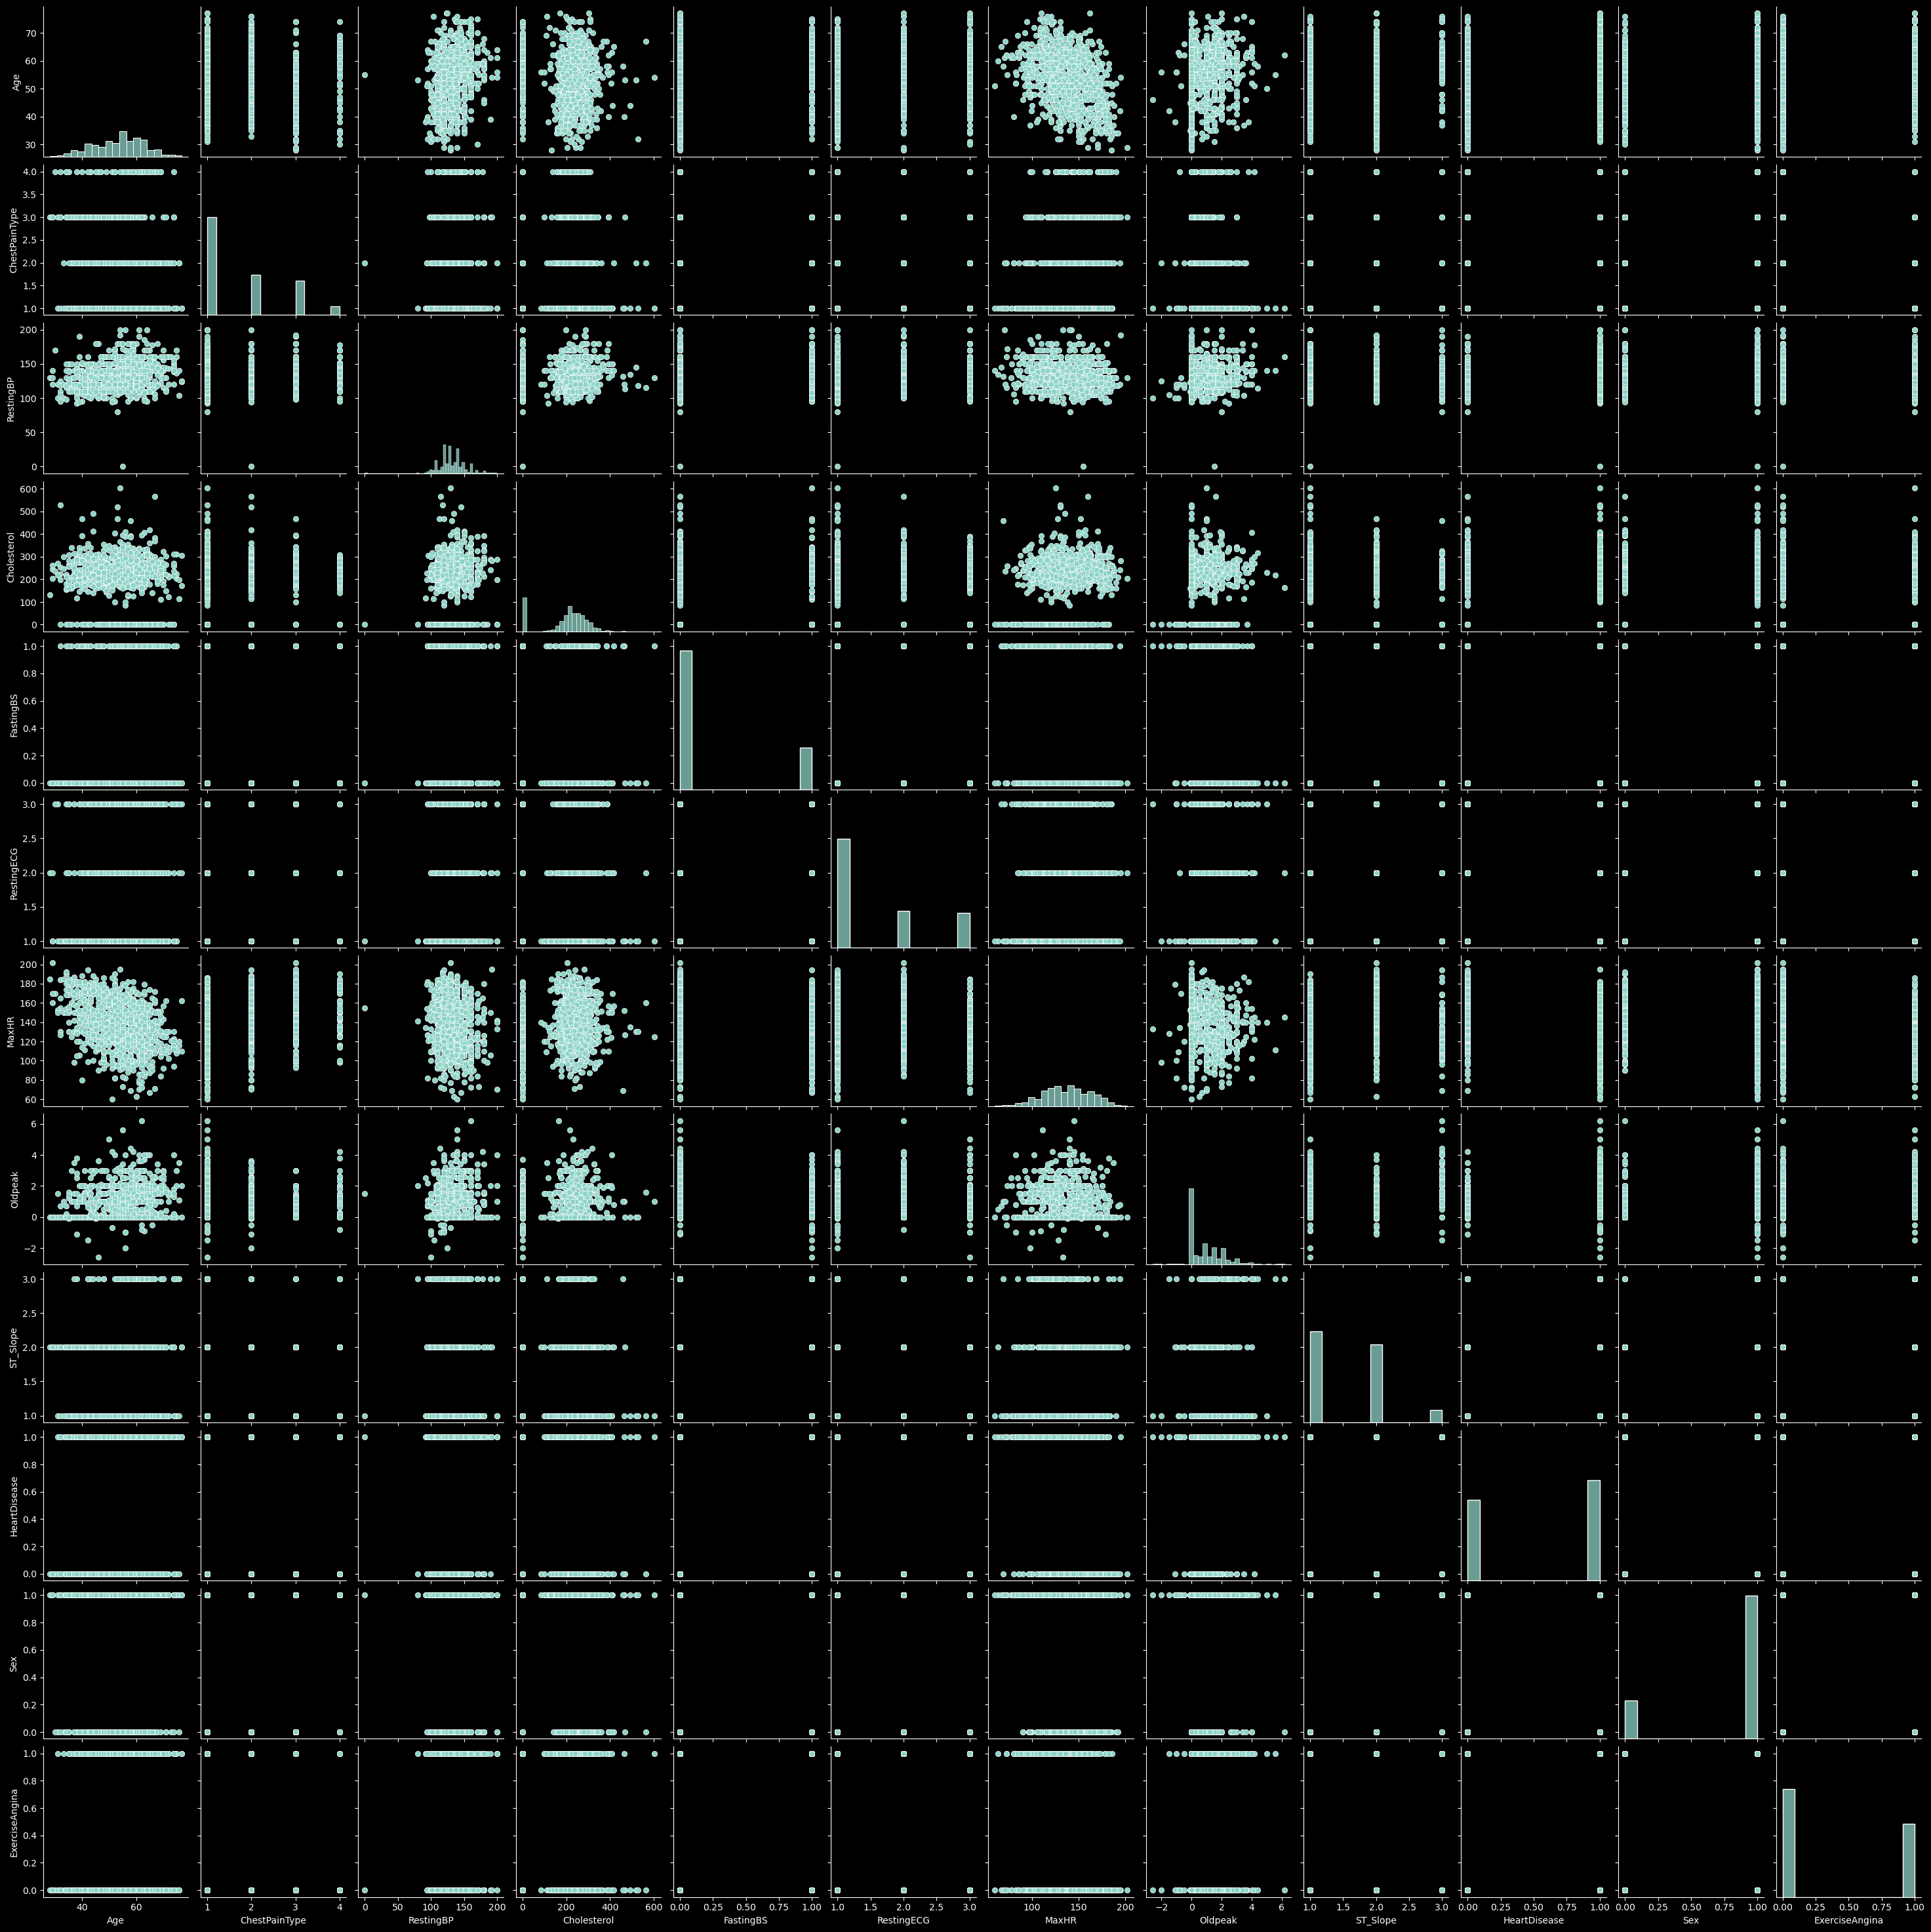

In [40]:
sns.pairplot(df)

<AxesSubplot:>

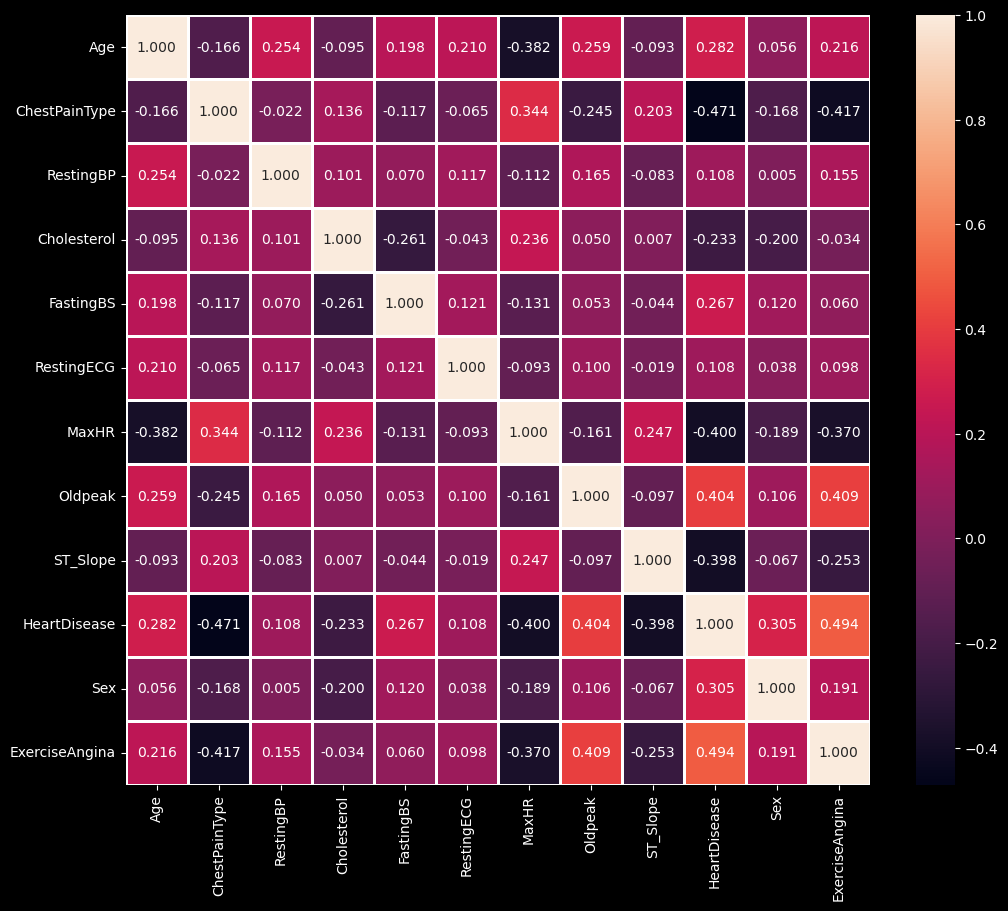

In [41]:
#Annot function show the value
plt.figure(figsize=(12,10))
sns.heatmap(corr_df,annot=True,fmt='.3f',linewidths=2)

In [42]:
#Observation: strong correlation with ExerciseAngina, ChestPainType 

array([[<AxesSubplot:xlabel='ExerciseAngina', ylabel='ExerciseAngina'>,
        <AxesSubplot:xlabel='ChestPainType', ylabel='ExerciseAngina'>,
        <AxesSubplot:xlabel='HeartDisease', ylabel='ExerciseAngina'>],
       [<AxesSubplot:xlabel='ExerciseAngina', ylabel='ChestPainType'>,
        <AxesSubplot:xlabel='ChestPainType', ylabel='ChestPainType'>,
        <AxesSubplot:xlabel='HeartDisease', ylabel='ChestPainType'>],
       [<AxesSubplot:xlabel='ExerciseAngina', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='HeartDisease', ylabel='HeartDisease'>]],
      dtype=object)

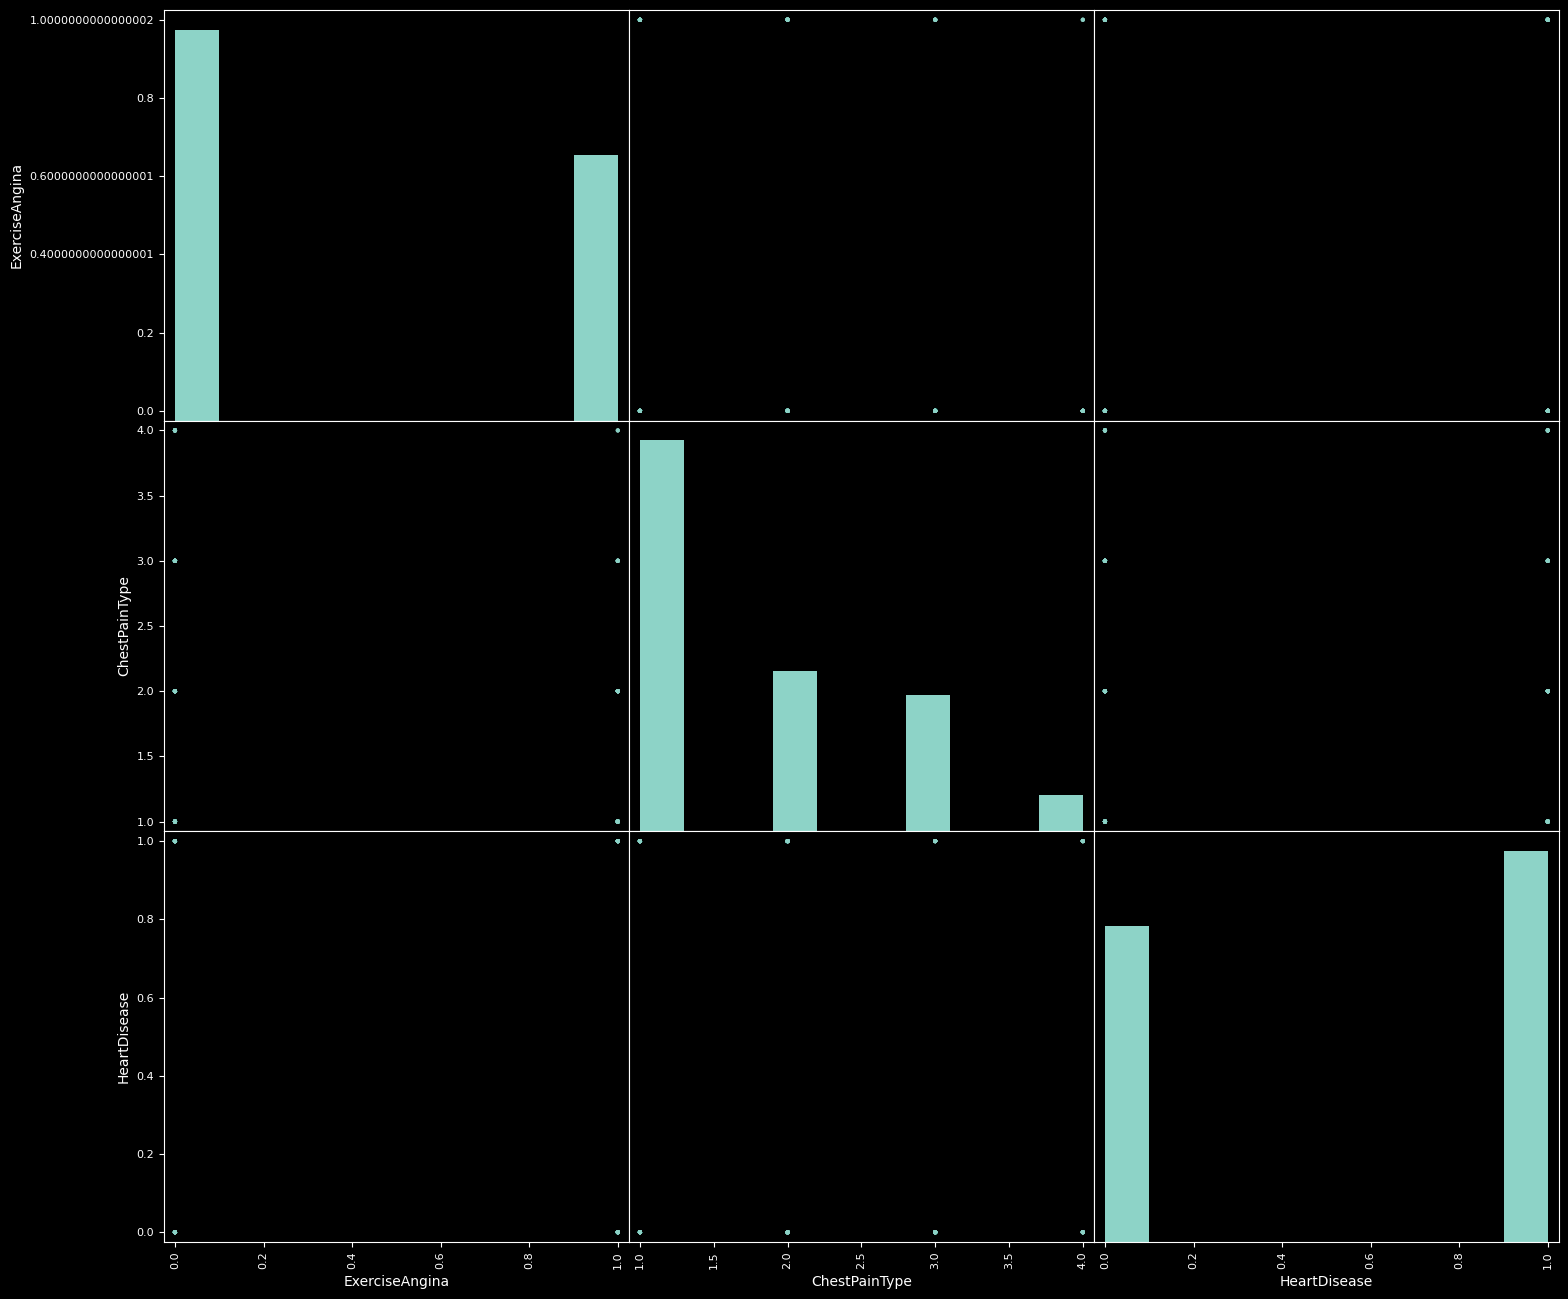

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[["ExerciseAngina","ChestPainType","HeartDisease"]],figsize=(18,16))

In [44]:
#Let me create a new attribute with the help of stronges correlated two column 

In [45]:
df["new"]=df["ChestPainType"]-df["ExerciseAngina"]

In [46]:
cor=df.corr()

In [47]:
cor["HeartDisease"].sort_values(ascending=False)

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingECG        0.107628
RestingBP         0.107589
Cholesterol      -0.232741
ST_Slope         -0.397802
MaxHR            -0.400421
ChestPainType    -0.471354
new              -0.558561
Name: HeartDisease, dtype: float64

In [48]:
#new attribute is more strong correlated with the 
#HeartDisease column so i will use that new column in my model for better resukt

array([[<AxesSubplot:xlabel='new', ylabel='new'>,
        <AxesSubplot:xlabel='HeartDisease', ylabel='new'>],
       [<AxesSubplot:xlabel='new', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='HeartDisease', ylabel='HeartDisease'>]],
      dtype=object)

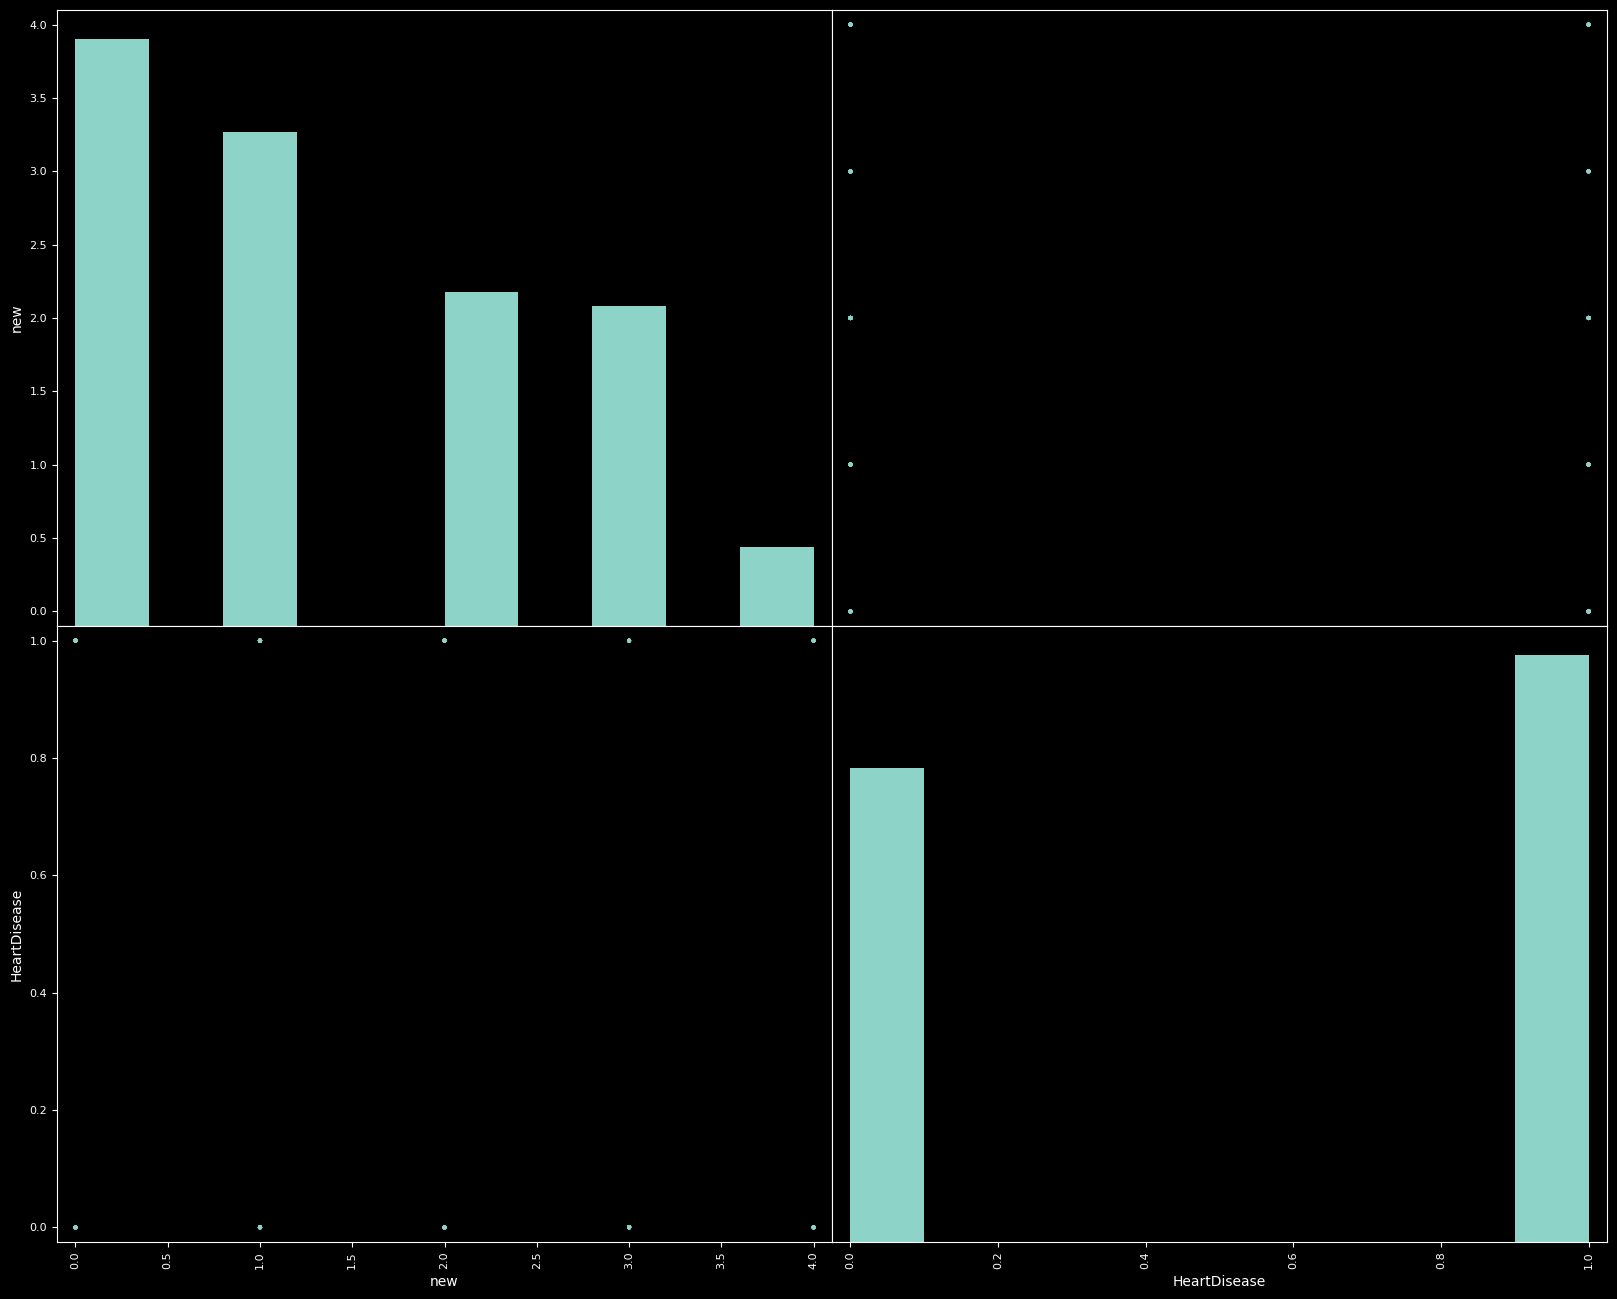

In [49]:
scatter_matrix(df[["new","HeartDisease"]],figsize=(20,16))

# Split The Data Into Train and Test

In [50]:
x=df.drop(columns={"HeartDisease"},axis=1)

In [51]:
y=df.iloc[:,9:-3]

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
x_test.shape

(184, 12)

In [54]:
y_train.shape

(734, 1)

In [55]:
y_test.shape

(184, 1)

In [56]:
x_train.shape

(734, 12)

In [57]:
y_train

,HeartDisease
795,0
25,0
84,1
10,0
344,1
...,...
106,0
270,0
860,1
435,0


# Features Scaling Process

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [59]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Model Building

In [60]:
#from sklearn.tree import DecisionTreeClassifier #82.60% accuracy
#model=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier   #89.13% accuracy
model=RandomForestClassifier()
#from sklearn.naive_bayes import GaussianNB  #82.60% accuracy
#model = GaussianNB()
#from sklearn.svm import SVC   #86.95% accuracy
#model=SVC()
#from sklearn.neighbors import KNeighborsClassifier  #85.86% accuracy
#model=KNeighborsClassifier()
model.fit(x_train,y_train)

C:\Users\RAFIKUL\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


RandomForestClassifier()

# Prediction With Test Data

In [61]:
#Prediction with x_test data set
prediction=model.predict(x_test)

In [62]:
prediction

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

# Error Calculation

In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [64]:
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(np.sqrt(mean_squared_error(y_test,prediction)))

0.10869565217391304
0.10869565217391304
0.3296902366978935


# Accuracy Test Of Model

In [65]:
from sklearn.metrics import accuracy_score
print("Accuracy of the mdoel is: ",accuracy_score(y_test,prediction)*100)

Accuracy of the mdoel is:  89.13043478260869


# Pickeling Model File For Deployement

In [66]:
import pickle
pickle.dump(model,open("heartmodel.pkl","wb"))
pickle_model=pickle.load(open("heartmodel.pkl","rb"))

In [67]:
#NOTE:--
#After added the new column to the model increased the accuracy
#without new column accuracy is 87.5 and when i added teh new column
#then accuracy is 89.13%
#CONCLUSION:--
#Thebest accuracy is given by RandomForest algorithm(89.13%) 
#i applied all the algorithm and checked it.